In [15]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

## Load Data

In [16]:
X_array, y_array = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.03,
                    random_state=42)

## NumPy array to torch Tensor

In [17]:
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.float)

## Train/Test split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.unsqueeze(dim=1)
y_test = y_test.unsqueeze(dim=1)

In [19]:
# name dimensions
X1 = X_array[:, 0]
X2 = X_array[:, 1]

## Visualise

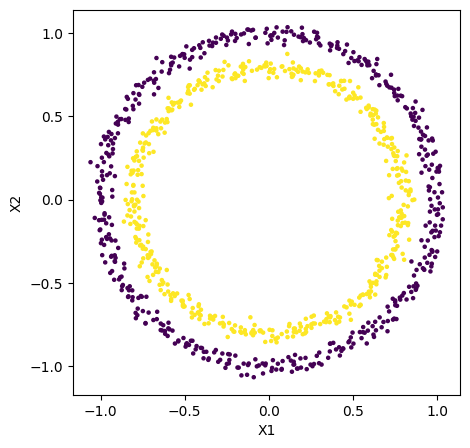

In [20]:
plt.figure(figsize=(5,5))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1, X2, s=5, c=y)

## Build model

In [21]:
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=2,
                      out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,
                      out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,
                      out_features=1),
            nn.ReLU()
        )

    def forward(self, X: torch.Tensor):
        return self.linear_layer(X)

In [22]:
model = BinaryClassificationModel()

## Train/Evaluation model

In [23]:
torch.manual_seed(42)

# define training function
def train_model(model : torch.nn.Module,
                x_train : torch.Tensor,
                y_train : torch.Tensor,
                loss_fn : torch.nn.functional,
                acc_fn : torch.nn.functional,
                optimizer : torch.optim):
    model.train()
    train_logits = model(x_train)
    train_pred = torch.round(torch.sigmoid(train_logits))
    train_acc = acc_fn(train_pred, y_train)
    train_loss = loss_fn(train_logits, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    return train_loss, train_acc


# define evaluation function
def eval_model(model : torch.nn.Module,
               x_test : torch.Tensor,
               y_test : torch.Tensor,
               loss_fn : torch.nn.functional,
               acc_fn : torch.nn.functional):
    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test)
    return test_loss, test_acc

## Train/Test loop

In [24]:
# define Accuracy function
def accuracy(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    return (correct/len(y_true))*100

# define Loss function
loss_fn = nn.BCEWithLogitsLoss()

# define Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.2)

# define Acuracy function
acc_fn = accuracy

epochs = 5000
torch.manual_seed(42)

epoch_values = []
train_loss_values = []
test_loss_values = []
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_model(model,
                        X_train,
                        y_train,
                        loss_fn,
                        acc_fn,
                        optimizer)
    test_loss, test_acc = eval_model(model,
                      X_test,
                      y_test,
                      loss_fn,
                      acc_fn)
    if epoch%100==0:
       epoch_values.append(epoch)
       train_loss_values.append(train_loss)
       test_loss_values.append(test_loss)
       print(f"Epoch : {epoch} | Train_loss : {train_loss :.3f} | Train_acc : {train_acc :.2f}% | Test_loss : {test_loss :3f} | test_acc : {test_acc :.2f}%")
    

 10%|█         | 512/5000 [00:00<00:01, 2608.56it/s]

Epoch : 0 | Train_loss : 0.693 | Train_acc : 50.12% | Test_loss : 0.692992 | test_acc : 49.50%
Epoch : 100 | Train_loss : 0.690 | Train_acc : 52.62% | Test_loss : 0.690611 | test_acc : 50.00%
Epoch : 200 | Train_loss : 0.687 | Train_acc : 54.12% | Test_loss : 0.688059 | test_acc : 52.50%
Epoch : 300 | Train_loss : 0.681 | Train_acc : 56.50% | Test_loss : 0.684063 | test_acc : 54.50%
Epoch : 400 | Train_loss : 0.671 | Train_acc : 59.50% | Test_loss : 0.676511 | test_acc : 57.00%
Epoch : 500 | Train_loss : 0.644 | Train_acc : 62.75% | Test_loss : 0.652556 | test_acc : 61.50%


 24%|██▍       | 1206/5000 [00:00<00:01, 3191.02it/s]

Epoch : 600 | Train_loss : 0.591 | Train_acc : 69.50% | Test_loss : 0.598734 | test_acc : 68.50%
Epoch : 700 | Train_loss : 0.536 | Train_acc : 61.50% | Test_loss : 0.556862 | test_acc : 94.50%
Epoch : 800 | Train_loss : 0.476 | Train_acc : 72.25% | Test_loss : 0.506301 | test_acc : 98.00%
Epoch : 900 | Train_loss : 0.433 | Train_acc : 82.12% | Test_loss : 0.452620 | test_acc : 98.50%
Epoch : 1000 | Train_loss : 0.405 | Train_acc : 89.25% | Test_loss : 0.417815 | test_acc : 97.00%
Epoch : 1100 | Train_loss : 0.390 | Train_acc : 92.12% | Test_loss : 0.402427 | test_acc : 97.00%
Epoch : 1200 | Train_loss : 0.380 | Train_acc : 93.50% | Test_loss : 0.394304 | test_acc : 97.00%
Epoch : 1300 | Train_loss : 0.373 | Train_acc : 94.62% | Test_loss : 0.387356 | test_acc : 97.00%


 39%|███▊      | 1926/5000 [00:00<00:00, 3428.67it/s]

Epoch : 1400 | Train_loss : 0.369 | Train_acc : 95.88% | Test_loss : 0.381977 | test_acc : 97.00%
Epoch : 1500 | Train_loss : 0.365 | Train_acc : 97.00% | Test_loss : 0.377203 | test_acc : 97.00%
Epoch : 1600 | Train_loss : 0.363 | Train_acc : 97.00% | Test_loss : 0.374347 | test_acc : 97.50%
Epoch : 1700 | Train_loss : 0.361 | Train_acc : 97.00% | Test_loss : 0.373250 | test_acc : 97.50%
Epoch : 1800 | Train_loss : 0.359 | Train_acc : 98.62% | Test_loss : 0.372317 | test_acc : 98.00%
Epoch : 1900 | Train_loss : 0.358 | Train_acc : 98.88% | Test_loss : 0.371378 | test_acc : 98.00%
Epoch : 2000 | Train_loss : 0.357 | Train_acc : 98.50% | Test_loss : 0.370600 | test_acc : 98.00%
Epoch : 2100 | Train_loss : 0.356 | Train_acc : 98.25% | Test_loss : 0.369862 | test_acc : 98.00%


 53%|█████▎    | 2646/5000 [00:00<00:00, 3522.04it/s]

Epoch : 2200 | Train_loss : 0.356 | Train_acc : 98.25% | Test_loss : 0.369017 | test_acc : 98.00%
Epoch : 2300 | Train_loss : 0.355 | Train_acc : 99.00% | Test_loss : 0.369067 | test_acc : 98.00%
Epoch : 2400 | Train_loss : 0.355 | Train_acc : 99.00% | Test_loss : 0.369064 | test_acc : 98.00%
Epoch : 2500 | Train_loss : 0.354 | Train_acc : 99.00% | Test_loss : 0.368986 | test_acc : 98.00%
Epoch : 2600 | Train_loss : 0.354 | Train_acc : 98.75% | Test_loss : 0.367970 | test_acc : 98.00%
Epoch : 2700 | Train_loss : 0.353 | Train_acc : 99.38% | Test_loss : 0.368521 | test_acc : 98.00%
Epoch : 2800 | Train_loss : 0.353 | Train_acc : 99.50% | Test_loss : 0.368510 | test_acc : 98.00%
Epoch : 2900 | Train_loss : 0.353 | Train_acc : 99.00% | Test_loss : 0.366774 | test_acc : 98.00%


 67%|██████▋   | 3369/5000 [00:01<00:00, 3569.24it/s]

Epoch : 3000 | Train_loss : 0.353 | Train_acc : 99.12% | Test_loss : 0.366538 | test_acc : 98.00%
Epoch : 3100 | Train_loss : 0.352 | Train_acc : 99.62% | Test_loss : 0.367077 | test_acc : 98.00%
Epoch : 3200 | Train_loss : 0.352 | Train_acc : 99.25% | Test_loss : 0.365873 | test_acc : 98.00%
Epoch : 3300 | Train_loss : 0.352 | Train_acc : 99.12% | Test_loss : 0.365459 | test_acc : 98.00%
Epoch : 3400 | Train_loss : 0.352 | Train_acc : 99.50% | Test_loss : 0.365613 | test_acc : 98.00%
Epoch : 3500 | Train_loss : 0.352 | Train_acc : 99.62% | Test_loss : 0.366014 | test_acc : 98.00%
Epoch : 3600 | Train_loss : 0.352 | Train_acc : 99.12% | Test_loss : 0.364480 | test_acc : 98.00%
Epoch : 3700 | Train_loss : 0.351 | Train_acc : 99.50% | Test_loss : 0.365123 | test_acc : 98.00%


 89%|████████▉ | 4454/5000 [00:01<00:00, 3604.41it/s]

Epoch : 3800 | Train_loss : 0.351 | Train_acc : 98.75% | Test_loss : 0.363256 | test_acc : 98.00%
Epoch : 3900 | Train_loss : 0.351 | Train_acc : 99.25% | Test_loss : 0.362899 | test_acc : 98.00%
Epoch : 4000 | Train_loss : 0.351 | Train_acc : 99.25% | Test_loss : 0.363091 | test_acc : 98.00%
Epoch : 4100 | Train_loss : 0.351 | Train_acc : 99.25% | Test_loss : 0.362895 | test_acc : 98.00%
Epoch : 4200 | Train_loss : 0.351 | Train_acc : 99.12% | Test_loss : 0.362571 | test_acc : 98.00%
Epoch : 4300 | Train_loss : 0.350 | Train_acc : 99.38% | Test_loss : 0.361556 | test_acc : 98.00%
Epoch : 4400 | Train_loss : 0.350 | Train_acc : 99.62% | Test_loss : 0.362041 | test_acc : 98.00%
Epoch : 4500 | Train_loss : 0.350 | Train_acc : 99.62% | Test_loss : 0.361429 | test_acc : 98.00%


100%|██████████| 5000/5000 [00:01<00:00, 3433.75it/s]

Epoch : 4600 | Train_loss : 0.350 | Train_acc : 99.38% | Test_loss : 0.360612 | test_acc : 98.00%
Epoch : 4700 | Train_loss : 0.350 | Train_acc : 99.62% | Test_loss : 0.360418 | test_acc : 98.00%
Epoch : 4800 | Train_loss : 0.350 | Train_acc : 99.62% | Test_loss : 0.360366 | test_acc : 98.00%
Epoch : 4900 | Train_loss : 0.350 | Train_acc : 99.25% | Test_loss : 0.359021 | test_acc : 98.00%


## Train/Test loss

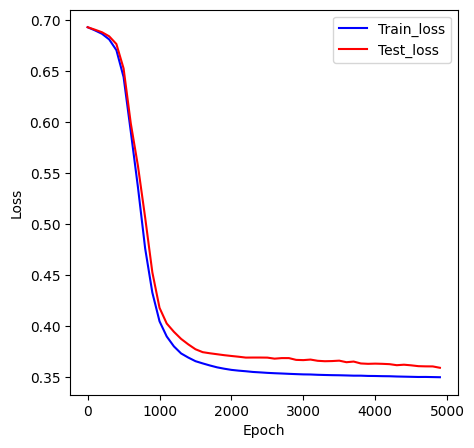

In [25]:
with torch.inference_mode():
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_values, train_loss_values, c='b', label='Train_loss')
    plt.plot(epoch_values, test_loss_values, c='r', label='Test_loss')
    plt.legend()

In [26]:
model.state_dict()

OrderedDict([('linear_layer.0.weight',
              tensor([[ 1.2740,  1.7014],
                      [-0.4840,  2.2528],
                      [-0.1549,  0.1427],
                      [-2.6938, -0.1676],
                      [ 0.7636, -2.7395],
                      [ 1.3708,  0.0078],
                      [ 2.0011,  0.0571],
                      [ 0.3410, -0.0998],
                      [ 0.6557,  0.7101],
                      [-0.3301,  0.1802]])),
             ('linear_layer.0.bias',
              tensor([-0.3026, -1.1346, -0.2872, -0.4639, -0.6888, -0.6929, -1.0494, -0.4252,
                      -0.1450, -0.6984])),
             ('linear_layer.2.weight',
              tensor([[-0.0858, -0.9948,  0.2441, -0.5266, -0.4560, -0.2333, -0.5179,  0.2555,
                       -0.0312, -0.0997],
                      [ 1.8664,  2.2432,  0.1331,  2.4453,  2.4107,  1.2990,  1.9825,  0.0566,
                        0.7988, -0.1927],
                      [-0.3130, -0.1236, -0.2426,  

## Sava model

In [27]:
model_path = Path('models')
model_path.mkdir(parents=True,
                 exist_ok=True)
model_name = "BinaryClassificationModel.pt"
torch.save(obj=model,
           f='/Users/navalmor/Desktop/PyTorch_Learning/classification/models/BinaryClassificationModel.pt')

## Load model

In [28]:
loaded_model = torch.load('/Users/navalmor/Desktop/PyTorch_Learning/classification/models/BinaryClassificationModel.pt')
loaded_model

BinaryClassificationModel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): ReLU()
  )
)